# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading data


In [2]:
athlete_data=pd.read_excel('/content/drive/MyDrive/Data Science Projects/Olymp_2021/Athletes.xlsx')
coach_data=pd.read_excel('/content/drive/MyDrive/Data Science Projects/Olymp_2021/Coaches.xlsx')
gender_data=pd.read_excel('/content/drive/MyDrive/Data Science Projects/Olymp_2021/EntriesGender.xlsx')
medal_data=pd.read_excel('/content/drive/MyDrive/Data Science Projects/Olymp_2021/Medals.xlsx')
team_data=pd.read_excel('/content/drive/MyDrive/Data Science Projects/Olymp_2021/Teams.xlsx')

# Data Showcase

In [3]:
athlete_data.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [4]:
athlete_data.describe()

,Name,NOC,Discipline
count,11085,11085,11085
unique,11062,206,46
top,PALTRINIERI Gregorio,United States of America,Athletics
freq,2,615,2068


In [5]:
coach_data.head()

,Unnamed: 0,Name,NOC,Discipline
0,0,ABDELMAGID Wael,Egypt,Football
1,1,ABE Junya,Japan,Volleyball
2,2,ABE Katsuhiko,Japan,Basketball
3,3,ADAMA Cherif,Côte d'Ivoire,Football
4,4,AGEBA Yuya,Japan,Volleyball


In [6]:
coach_data.describe()

,Unnamed: 0
count,394.000000
mean,196.500000
std,113.882249
min,0.000000
25%,98.250000
50%,196.500000
75%,294.750000
max,393.000000


In [7]:
gender_data.head()

,Unnamed: 0,Discipline,Female,Male
0,0,3x3 Basketball,32,32
1,1,Archery,64,64
2,2,Artistic Gymnastics,98,98
3,3,Artistic Swimming,105,0
4,4,Athletics,969,1072


In [8]:
gender_data.describe()

,Unnamed: 0,Female,Male
count,46.000000,46.000000,46.000000
mean,22.500000,118.086957,127.913043
std,13.422618,147.169717,166.900746
min,0.000000,10.000000,0.000000
25%,11.250000,42.750000,40.250000
50%,22.500000,90.000000,97.500000
75%,33.750000,138.750000,149.750000
max,45.000000,969.000000,1072.000000


In [9]:
medal_data.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [10]:
medal_data.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [11]:
team_data.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [12]:
team_data.describe()

,Name,Discipline,NOC,Event
count,743,743,743,743
unique,146,20,84,36
top,Japan,Swimming,Japan,Men
freq,45,113,48,120


# Descriptive Graphs

### 1.Discipline and Population

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


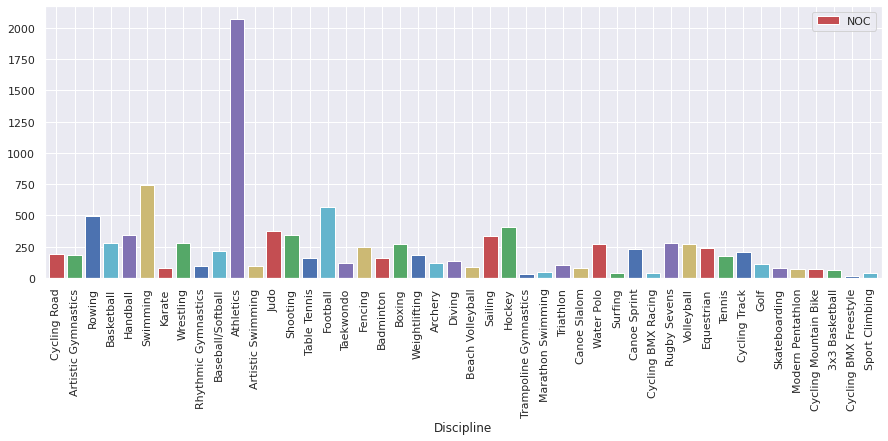

In [13]:
co_no=athlete_data.drop('Name',axis=1).groupby(['Discipline'],sort=False).count()
co_no.plot(kind='bar',figsize=(15,5),width=0.8,color='rgbcmy')

### This bar graph shows that the discipline athletics had the most number of athletes. 

### 2.Coaches vs Discipline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


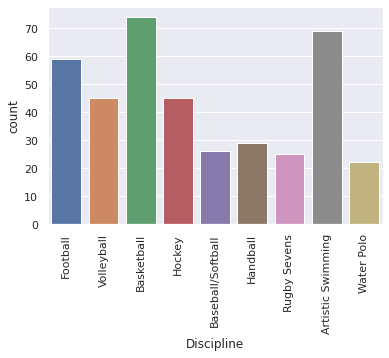

In [14]:
Coaches_dis = coach_data.loc[:,'Discipline']
sns.countplot(Coaches_dis)
plt.xticks(rotation='vertical')
plt.show()

### Here we infer that athletes from Basketball and Artistic Swimming had most number of coaches.

### 3.Gender Ratio

In [16]:
gen=gender_data.drop('Discipline',axis=1)
gen.index=gender_data['Discipline']
gen.head(10)

,Unnamed: 0,Female,Male
Discipline,,,
3x3 Basketball,0,32,32
Archery,1,64,64
Artistic Gymnastics,2,98,98
Artistic Swimming,3,105,0
Athletics,4,969,1072
Badminton,5,86,87
Baseball/Softball,6,90,144
Basketball,7,144,144
Beach Volleyball,8,48,48


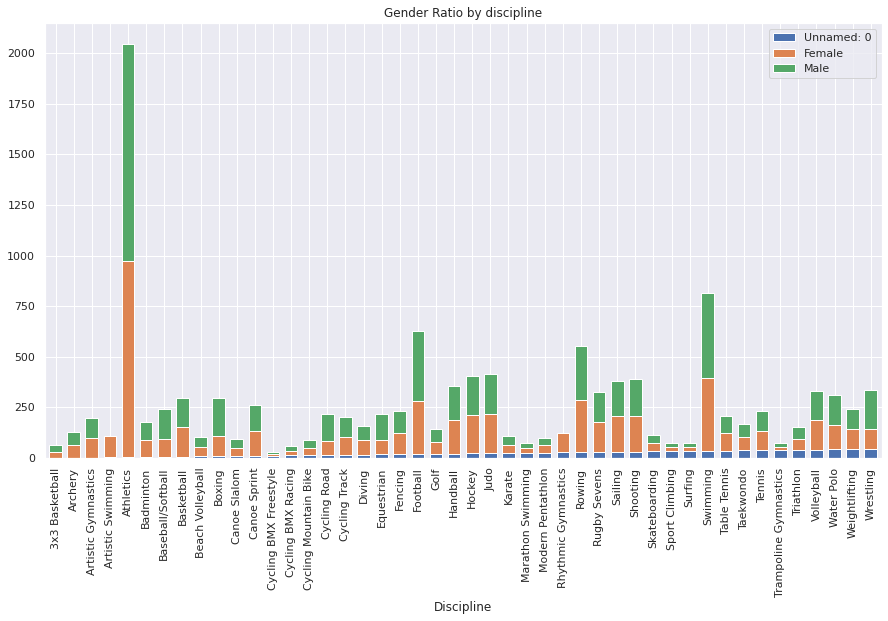

In [17]:
gen.plot(kind='bar', figsize=(15,8),width=0.7, stacked=True)

plt.xlabel('Discipline')
plt.ylabel('')
plt.title('Gender Ratio by discipline')

plt.show()

### It can be concluded from the graph that Gender ratio was maintained at 1:1 .

### 4.Teams vs Discipline


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


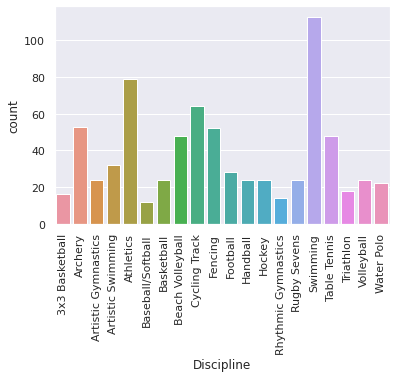

In [18]:
Discipline = team_data.loc[:,'Discipline']
sns.countplot(Discipline)
plt.xticks(rotation='vertical')
plt.show()

### Swimming seems to have the most number of teams.

### 5.Medals Won by Country

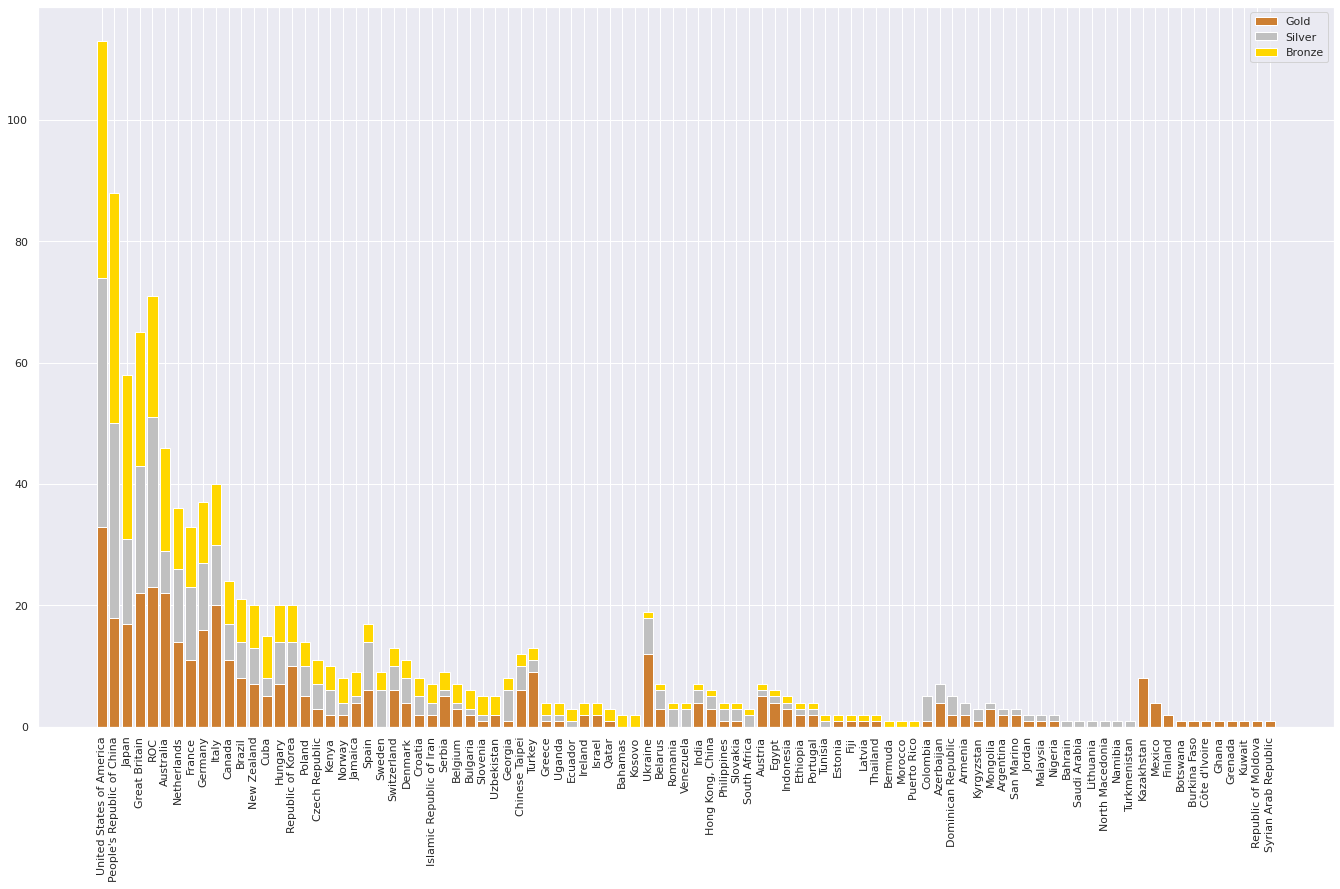

In [19]:
medals_country = medal_data.loc[:,'Team/NOC']
medals_Gold = medal_data.loc[:,'Gold']
medals_Silver = medal_data.loc[:,'Silver']
medals_Bronze = medal_data.loc[:,'Bronze']
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
fig.set_size_inches(18, 10)
ax.bar(medals_country,medals_Bronze,color = '#CD7F32')
ax.bar(medals_country,medals_Silver,bottom=medals_Bronze,color = '#C0C0C0')
ax.bar(medals_country,medals_Gold,bottom=medals_Silver+medals_Bronze,color = '#FFD700')
plt.xticks(rotation='vertical')
plt.legend(['Gold','Silver','Bronze'])
plt.show()

### Here, we can see that the USA scored most of the medals with over 100 medals.

## End of Exploratory Data Analysis.